# twissed

* Author: D. Minenna
* Date: January 2024

Tutorial on using the twissed package.
In this notebook, we are presenting a number of plasma functions from PIC simulations.

## Import
The import of the package is done by the command:
```python
import twissed
```

In [1]:
# Import
import numpy as np
import matplotlib.pyplot as plt
import os

# twissed
import twissed

# Select colormaps
cm = twissed.Cmap()


 twissed (v2.1.1, 2023/01/25)



For fbpic simulations, we can check the presence of files in the defined directory

In [2]:
# Selection of the directory with data
directory = os.getcwd() + '/data/FBPIC/lab_diags'

# Find all timesteps
steps = twissed.Steps()
steps.find_data(directory=directory,source='fbpic',verbose=True)

c:\Minenna\Programmation\Twissed_tutorial/data/FBPIC/lab_diags/hdf5
timesteps: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


Now we create the **step** object. It will contain all the information about fields at a given timestep.

In [3]:
# timestep selection
timestep = 20

#Creation of the step class
step = twissed.Step()

# Read data 
step = steps.read_field(step,timestep)

# Print attributs obtained
print(step.keys())

['verbose', 'dt', 'time', 'timestep', 'timeUnitSI', 'rho2D', 'density2D', 'Er1D', 'Er2D', 'Et1D', 'Et2D', 'Ez2D', 'Ez1D', 'Ex1D', 'Ey1D', 'Ex2D', 'Ey2D', 'Ey2D_env', 'dr', 'rfield', 'Nrfield', 'dz', 'zfield', 'Nzfield', 'omega', 'omega0', 'Ey1D_env', 'a01D', 'zfield_a0', 'a0_max', 'a02D', 'r_FWHM_intensity_simu', 'z_FWHM_intensity_simu', 'waist0_max']


These are examples of what you get and what you can do with the step class. The default unit is always the same but you can convert it with the function

In [4]:
print(f"a0: {step.a0_max}")
print(f"Field E_z {step.Ez1D}")
step.print('dt')
print(f"Convert dt: {step.convert('dt','as')} [as]")

a0: 2.789533840129043
Field E_z [ 3.69954674e+10  3.90802796e+10  4.17198136e+10 ... -9.03593362e+03
 -5.52489642e+03  0.00000000e+00]
5.92908991305983e-16 [s], Simulation time step.
Convert dt: 592.9089913059829 [as]


You can plot directly from the step class.

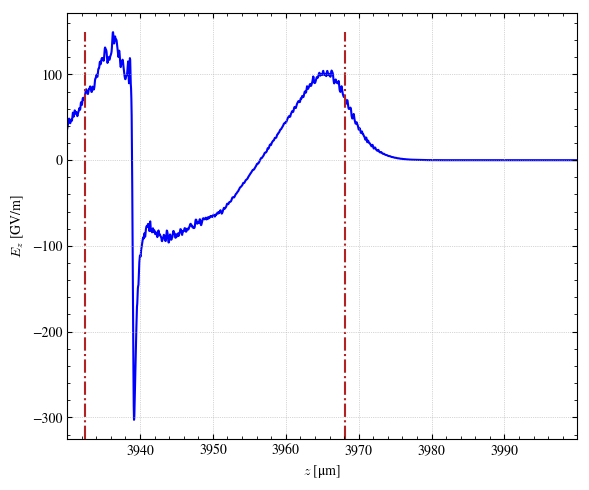

In [5]:
step.plot_field1D(
    'zfield',  # Variable name in x
    'Ez1D',  # Variable name in y
    xconv='um',  # SI units for conversion in the x axis
    yconv='GV/m',  # SI units for conversion in the y axis
)

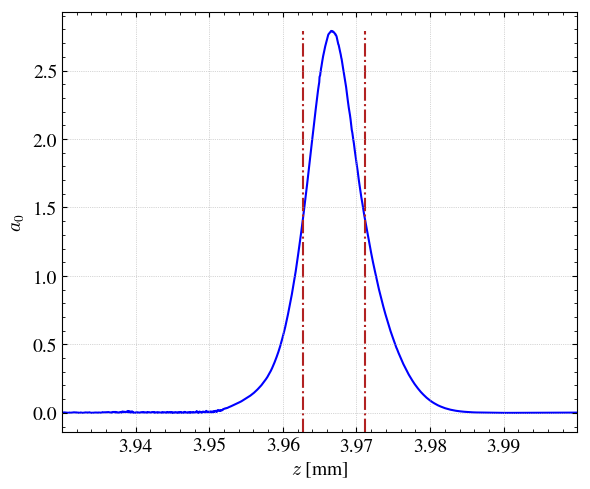

In [6]:
step.plot_field1D(
    'zfield',
    'a01D',
    xconv='mm',
)

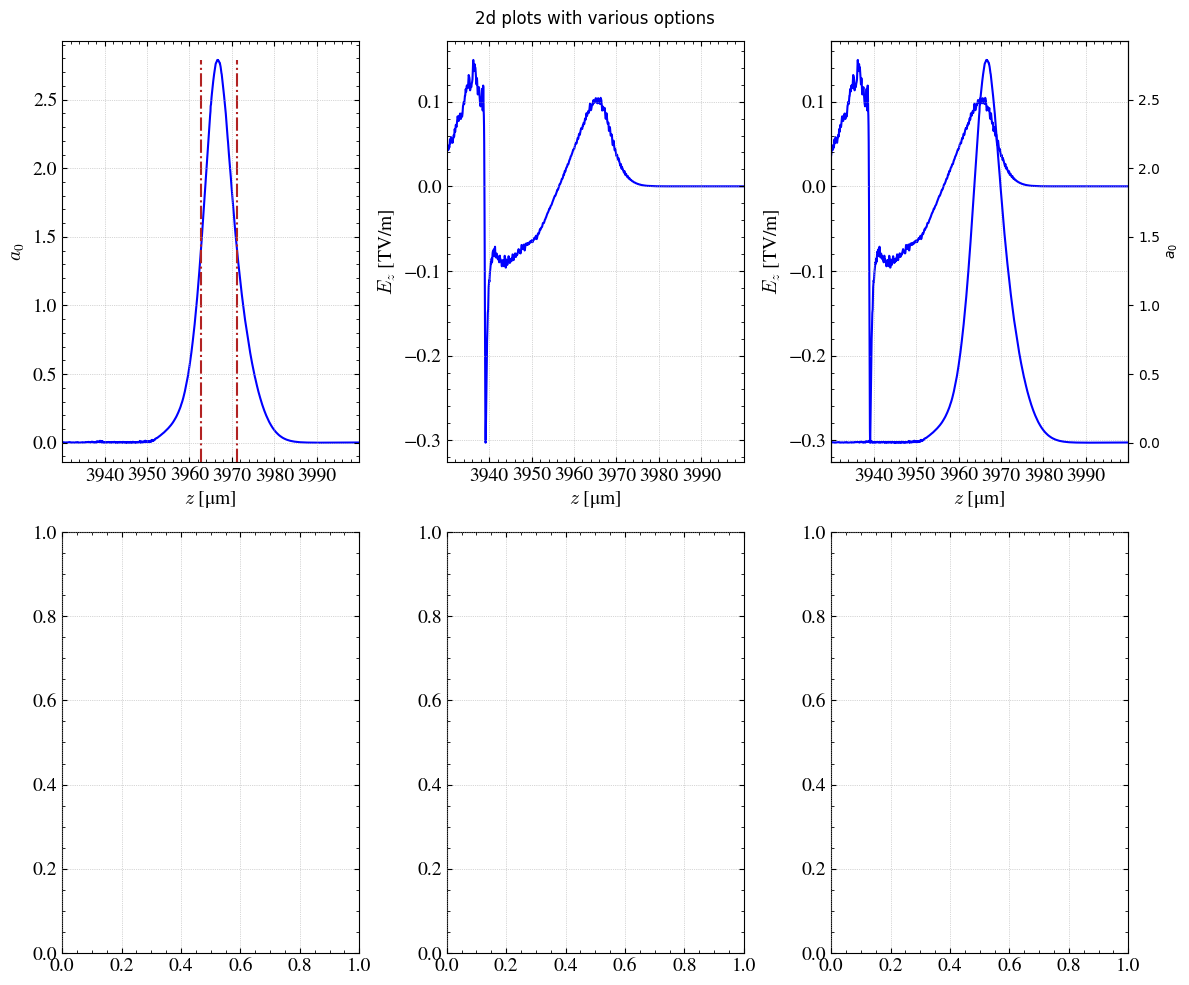

In [7]:
with plt.rc_context(twissed.rcParams): # Figure formatting
    fig, axs = plt.subplots(2,3, figsize=(12,10), dpi=100, tight_layout=True)
    
fig.suptitle(f"2d plots with various options")

ax = axs[0,0]
step.plot_field1D(
    'zfield',
    'a01D',
    xconv='um',
    ax=ax,  # Note the addition ax argument!
)

ax = axs[0,1]
step.plot_field1D(
    'zfield',
    'Ez1D',
    xconv='um',
    yconv='TV/m',
    ax=ax,  # Note the addition ax argument!
    fwhm=False,  # Plot the FWHM (Default to True)
)


ax = axs[0,2]
step.plot_field1D(
    'zfield',
    'Ez1D',
    xconv='um',
    yconv='TV/m',
    ax=ax,  # Note the addition ax argument!
    fwhm=False,
)
step.plot_field1D(
    'zfield',
    'a01D',
    xconv='um',
    ax=ax,  # Note the addition ax argument!
    fwhm=False,
    yaxisleft=True, # Plot the yaxis on the left
)

## 2D plot

2d plot are also available.

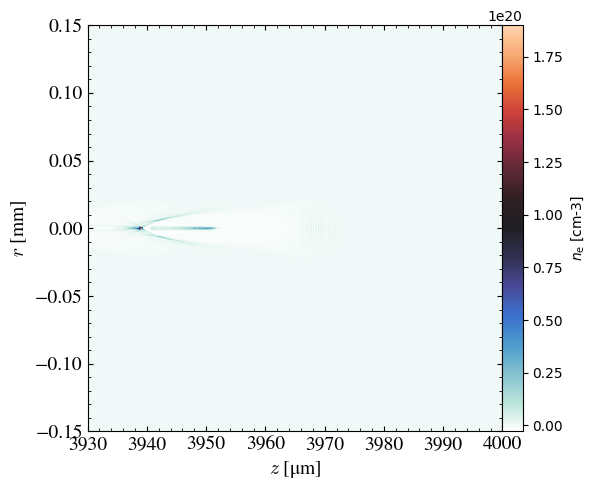

In [8]:
# Simple plot of the density
step.plot_field2D(
    'zfield',
    'rfield',
    'density2D',
    xconv='um',
    yconv='mm',
    zconv='cm-3',
    # cmap=cm.gist_earth,
)

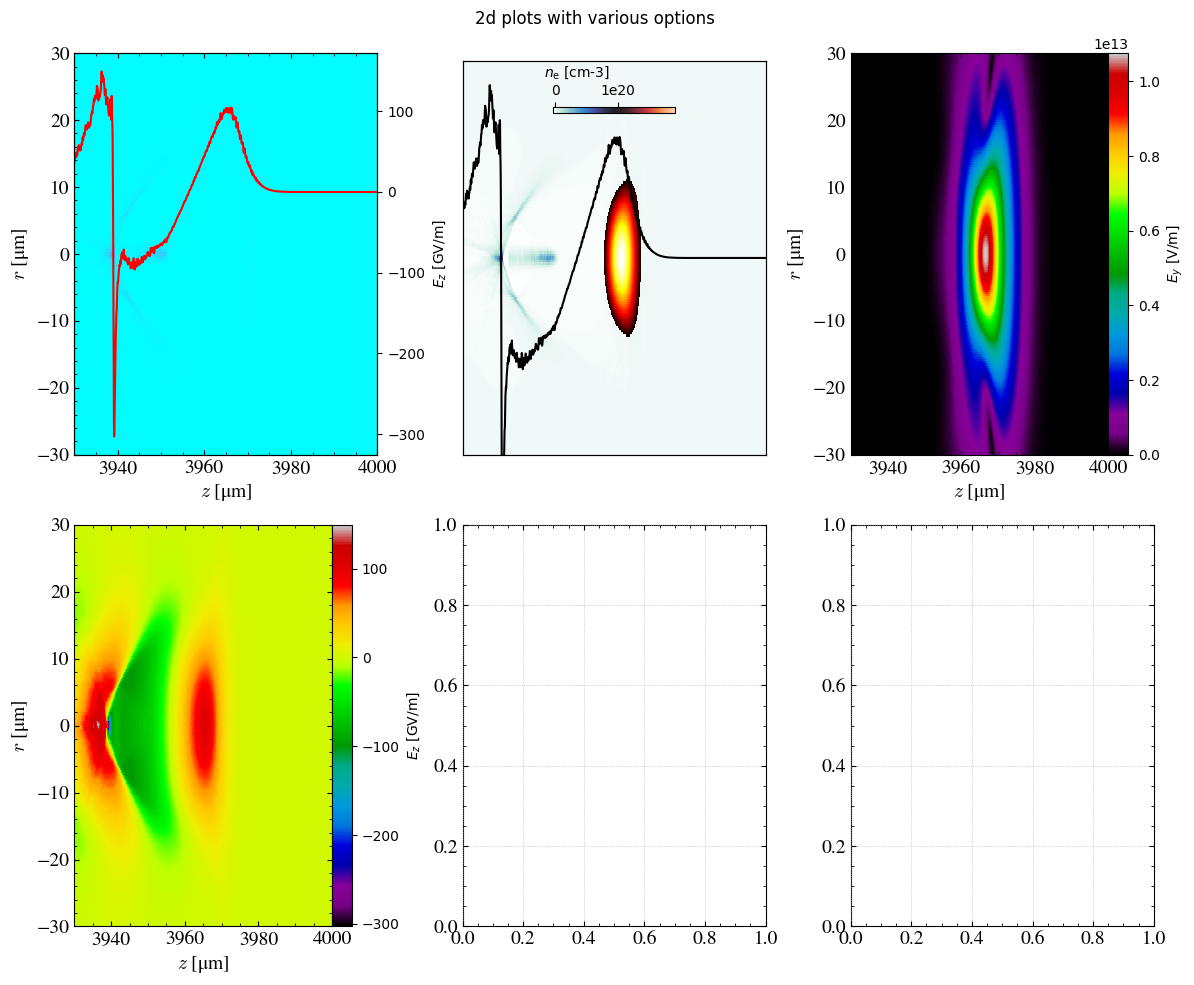

In [9]:
with plt.rc_context(twissed.rcParams): # Figure formatting
    fig, axs = plt.subplots(2,3, figsize=(12,10), dpi=100, tight_layout=True)
    
fig.suptitle(f"2d plots with various options")

ax = axs[0,0]
step.plot_field2D(
    'zfield',
    'rfield',
    'density2D',
    xconv='um',
    yconv='um',
    zconv='cm-3',
    yrange=[-30,30],
    Ez1D=True,
    Ez1D_conv="GV/m",
    Ez1D_range=[None,None],
    Ez1D_color="red",
    iscbar=False,
    ax=ax,
    cmap=cm.cool,
)

ax = axs[0,1]
step.plot_field2D(
    'zfield',
    'rfield',
    'density2D',
    xconv='um',
    yconv='um',
    zconv='cm-3',
    yrange=[-30,30],
    # cmap=cm.inferno_r,
    xlabel=False,
    ylabel=False,
    Ez1D=True,
    Ez1D_conv="GV/m",
    Ez1D_range=[-170,170],
    Ez1D_color="black",
    Ez1D_ylabel=False,
    Ey2D_env=True,
    grid=False,
    iscbar="cbar_reduced_b",
    ax=ax,
)


ax = axs[0,2]
step.plot_field2D(
    'zfield',
    'rfield',
    'Ey2D_env',
    xconv='um',
    yconv='um',
    yrange=[-30,30],
    cmap=cm.nipy_spectral,
    ax=ax,
)


ax = axs[1,0]
step.plot_field2D(
    'zfield',
    'rfield',
    'Ez2D',
    xconv='um',
    yconv='um',
    zconv='GV/m',
    yrange=[-30,30],
    cmap=cm.nipy_spectral,
    ax=ax,
)